# **DAEGU APARTMENT**

[Sumber data Daegu Apartment](https://www.kaggle.com/datasets/gunhee/koreahousedata) 

### **Contents**

- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Modelling
- Conclusion
- Rekomendation

****

# **Business Problem Understanding**

**Context**

Daegu yang memiliki nama resmi Kota Metropolitan Daegu ini adalah metropolitan terbesar ke-3 di Korea Selatan setelah Seoul dan Busan yang memiliki Penduduk sekitar 2,5 Juta jiwa. Daegu dikelilingi oleh pegunungan Palgong-san di utara, Biseul-san di selatan, kaki bukit Gaya-san di barat, dan satu deretan bukit kecil di timur. Dengan pemandangan indah dan suasana yang tampak cukup sejuk ini, Daegu tetap saja seperti kota-kota metropolitan lainnya. Dengan kehidupan perkotaan yang padat penduduk namun lahan terbatas membuat Daegu seperti kota metropolitan lainnya yang mengandalkan apartment sebagai pilihan untuk tempat tinggal penduduknya. Di Korea Selatan sendiri terutama di kota-kota besar kebanyakan orang lebih memilih menjual/membeli apartment melalui agen properti. Ini membuat banyaknya agen properti yang menjajakan jasanya dalam membantu menjual atau membeli apartment. Karena jika menggunakan jasa agen properti, pembeli maupun penjual tidak perlu kesusahan dalam transaksi maupun surat-surat yang harus diurus.

[Sumber](https://en.wikipedia.org/wiki/Daegu) 

**Problem Statement**

Masalah pada bisnis ini cukup sulit karena harus menentukan harga jual yang cocok untuk suatu apartment dengan fasilitas dan fitur-fitur tertentu di daerah Daebong, Kota Daegu ini. Oleh karena itu dibutuhkan Model yang tepat untuk menyelesaikan masalah penentuan harga jual apartment, agar dapat menghasilkan keuntungan bagi pemilik properti serta agen properti. Selain itu agar harga apartment di daerah itu terkesan adil dan tidak mengalami perbedaan yg besar antara satu apartment dengan apartment lainnya

**Goals**

Berdasarkan permasalahan ini, Agen properti tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu klien mereka (dalam hal ini tuan rumah) untuk dapat **menentukan harga jual properti yang tepat**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti tahun dibangunnya, lokasi, tipe hallway dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi tuan rumah.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu apartment dengan yang lainnya.
Selanjutnya, kita akan membangun suatu model regresi yang akan membantu agen properti untuk dapat menyediakan 'tool' prediksi harga jual apartment yang baru masuk dalam daftar Agen Penjualan Properti, yang mana akan berguna untuk tuan rumah dalam menentukan harga jual apartmentnya.

**Metric Evaluation**

Diantara Evaluasi metrik yang sering digunakan untuk memprediksi seperti MSE, RMSE dan MAPE, kali ini saya memilih mengggunaka **MAE**. Dimana MAE adalah rataan nilai absolut dari error. Cara kerja nya adalah Semakin kecil nilai MAE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

## **Data Understanding**

- Dataset merupakan data transaksi apartement dari Agustus 2007 hingga Agustus 2017 di Daebong, kota Daegu, Korea Selatan yang diambil dari laman data.go.kr.
- Setiap baris data merepresentasikan informasi terkait keadaan apartment hingga harga penjualan apartment tersebut.
- Dataset terdiri dari 4123 baris dan 11 kolom.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe lorong masuk apartment  |
| TimeToSubway | Object | Waktu yang dibutuhkan menuju Stasiun Subway (min) |
| SubwayStation | Object | Nama Stasiun Subway terdekat |
| N_FacilitiesNearBy(ETC) | Float | Jumlah fasilitas di dekat apartment seperti hotel, sekolah berkebutuhan khusus |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah Kantor Layanan Publik di dekat apartment |
| N_SchoolNearBy(University) | Float | Jumlah Universitas di dekat apartment |
| N_Parkinglot(Basement) | Float | Jumlah lahan parkir di basement |
| YearBuilt | Integer | Tahun dibangun |
| N_FacilitiesInApt | Integer | Jumlah fasilitas untuk penghuni seperti kolam renang, gym, taman bermain |
| Size(sqf) | Integer | Luas apartment |
| SalePrice | Integer | Harga apartment (US dollar) |


<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


#### **Exploratory Data Analysis**

**Distribution of Daegu Apartment SalePrice**

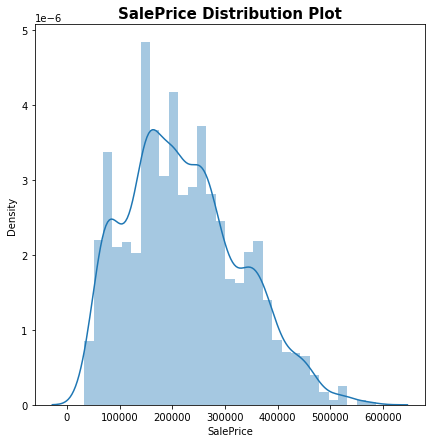

In [3]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga apartment di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur SalePrice.

**HallwayType dan YearBuilt**

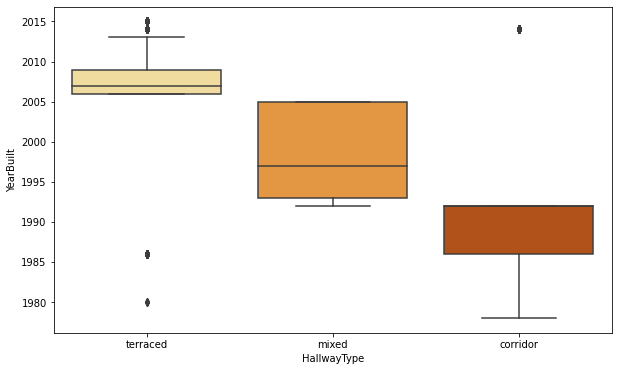

In [4]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='HallwayType', y='YearBuilt', data=df, palette='YlOrBr');

Berdasarkan boxplot di atas sebelum tahun 1995 lebih banyak apartment menggunakan hallway tipe corridor, sedangkan antara tahun 1995 dan 2005 apartment sudah mengenal hallway tipe terraced sehingga sudah mulai memakai tipe terraced namun tetap memakai tipe corridor, sementara itu corridor hallway sudah jarang digunakan setelah tahun 2005. 

# **Data Preprocessing**

Pada tahap ini, akan dilakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. 

In [5]:
# Cek info lebih detail untuk setiap fitur
daeguItem = []

for col in df.columns:
    daeguItem.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=daeguItem)
df_desc

,dataFeatures,dataType,null,unique,uniqueSample
0,HallwayType,object,0,3,"[terraced, corridor, mixed]"
1,TimeToSubway,object,0,5,"[0-5min, 15min~20min, no_bus_stop_nearby]"
2,SubwayStation,object,0,8,"[Sin-nam, no_subway_nearby, Myung-duk]"
3,N_FacilitiesNearBy(ETC),float64,0,4,"[5.0, 2.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,8,"[7.0, 0.0, 3.0]"
5,N_SchoolNearBy(University),float64,0,6,"[0.0, 2.0, 3.0]"
6,N_Parkinglot(Basement),float64,0,20,"[218.0, 56.0, 0.0]"
7,YearBuilt,int64,0,16,"[2008, 2006, 2014]"
8,N_FacilitiesInApt,int64,0,9,"[9, 8, 1]"
9,Size(sqf),int64,0,89,"[213, 1761, 1643]"


**Missing Value**

Berdasarkan dataframe di atas tidak terdapat missing value.

**Drop Kolom**

Tidak ada Kolom yang perlu di drop, karena semua kolom berhubungan dengan kolom target.

**Data Correlation**

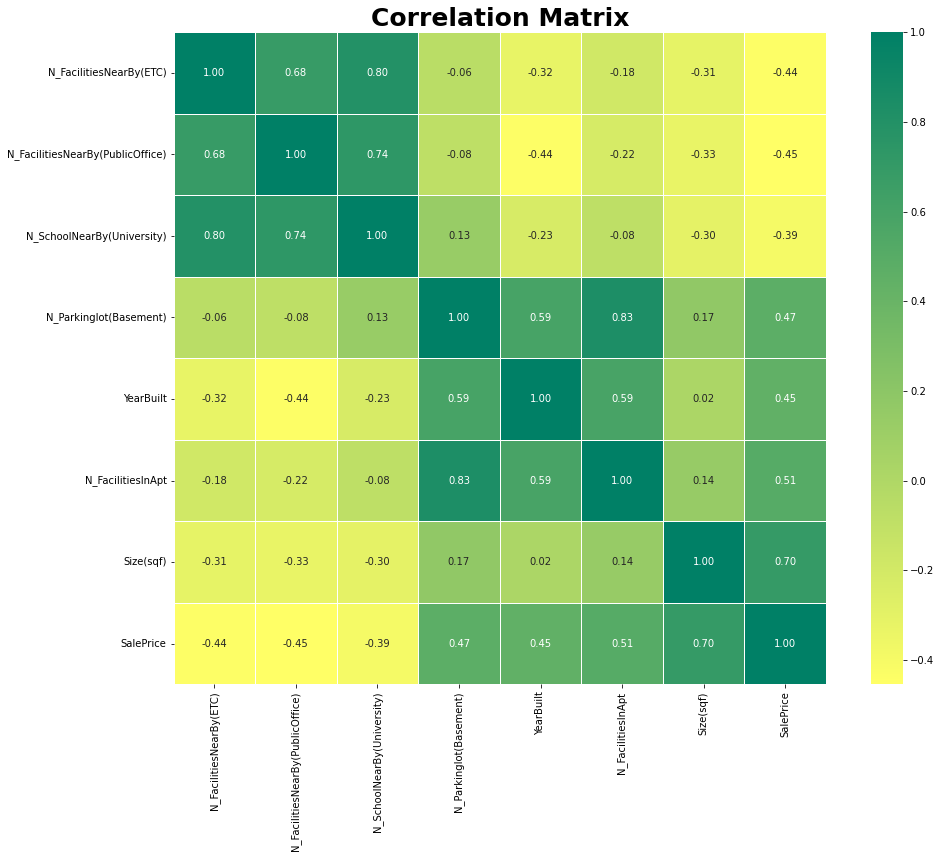

In [6]:
# Correlation Matrix
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='summer_r',  fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=25, weight='bold');

- Berdasarkan correlation matrix di atas,  `SalePrice` memiliki korelasi yang cukup kuat dengan `Size(sqf)` sebesar 0,7
- Hal ini menunjukkan apabila semakin besar ukuran apartment maka akan semakin mahal juga harga apartment tersebut
- Selain itu, meskipun fitur lain memiliki korelasi rendah saya tidak akan menghapus kolom-kolom tersebut. Korelasi fitur lain rendah bisa jadi dikarenakan data yang kurang banyak. 

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

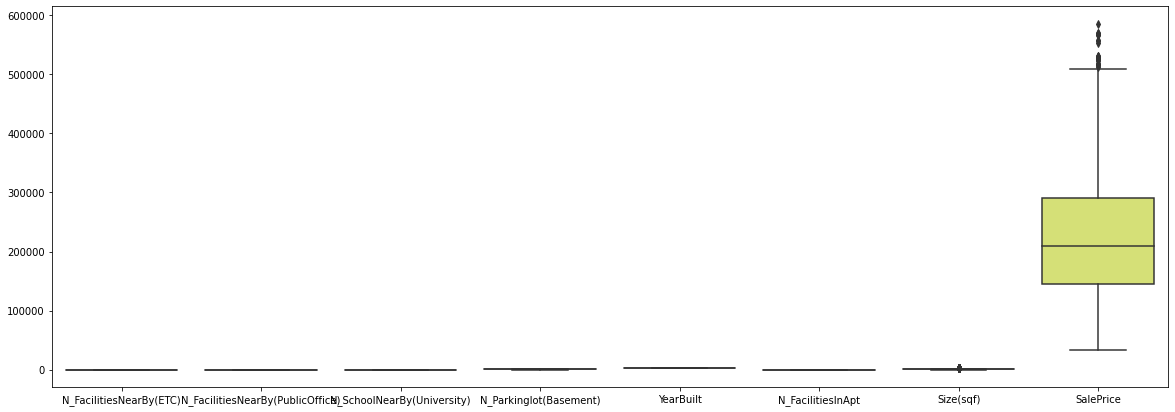

In [7]:
# Plot boxplot untuk mengecek outliers
plt.figure(figsize=(20,7))
sns.boxplot(data=df, palette="summer");

Berdasarkan boxplot di atas, fitur yang memiliki outliers adalah `SalePrice` dan `Size(sqf)`. Untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [8]:
# Membuat fungsi untuk mengecek outliers
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower = q1 - limit
    upper = q3 + limit
    print(f'limit_bawah: {lower}')
    print(f'limit_atas: {upper}')        

**SalePrice**

In [9]:
# Cek deskriptif statistik kolom SalePrice
df['SalePrice'].describe()

count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [10]:
# Outliers pada fitur 'SalePrice'
outliers(df['SalePrice'])

IQR: 146398.0
limit_bawah: -74845.0
limit_atas: 510747.0


In [11]:
# Drop data outlier pada data 'SalePrice'
df = df[df['SalePrice'] <= 510747.0]

In [12]:
# Cek deskriptif statistik kolom 'SalePrice' setelah drop Outliers
df['SalePrice'].describe()

count      4096.000000
mean     219692.548828
std      103961.039574
min       32743.000000
25%      144752.000000
50%      207964.000000
75%      287610.000000
max      508849.000000
Name: SalePrice, dtype: float64

**Size(sqf)**

In [13]:
# Cek deskriptif statistik kolom Size(sqf)
df['Size(sqf)'].describe()

count    4096.000000
mean      949.107178
std       378.608713
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [14]:
# Outliers pada fitur 'Size(sqf)'
outliers(df['Size(sqf)'])

IQR: 487.0
limit_bawah: -86.5
limit_atas: 1861.5


In [15]:
# Drop data outlier pada data 'Size(sqf)'
df = df[df['Size(sqf)'] <= 1861.5]

In [16]:
# Cek deskriptif statistik kolom 'Size(sqf)' setelah drop Outliers
df['Size(sqf)'].describe()

count    4015.000000
mean      925.216936
std       341.828592
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      1796.000000
Name: Size(sqf), dtype: float64

- Drop data outlier pada fitur `SalePrice` dengan batas atas  yaitu 510747 USD. Maka, data yang digunakan hanya apartment yang memiliki harga jual kurang dari dengan 510747 USD.
- Drop data outlier pada fitur `Size(sqf)` dengan batas atas  yaitu 1861.5 sqf. Maka, data yang digunakan hanya apartment yang memiliki luas kurang dari dengan 1861.5 sqf.
- Kegiatan ini bisa disebut project limitation dengan harga jual kurang dari 510747 USD serta bangunan yang luasnya tidak lebih dari 1861.5 sqf.

# **Modelling**

**Import Library Machine Learning**

In [17]:
# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Algoritma Modelling Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

- Pada dataset ini terdapat fitur yang memiliki tipe data Object, untuk dapat digunakan dalam machine learning maka harus dilakukan encoding.
- `HallwayType` dilakukan encoding menggunakan OneHotEncoding karena hanya memiliki 3 kategori
- `SubwayStation` dilakukan encoding menggunakan Binary Encoding karena hanya memiliki 8 kategori
- `TimeToSubway` dilakukan encoding menggunakan Ordinal Encoding karena data akan diurutkan menjadi semakin tinggi nilai skor kategori semakin bagus yang artinya semakin dekat dengan Subway 

In [18]:
# Ordinal Maping, mengubah menjadi
ordinalmap = [{'col':'TimeToSubway', 'mapping':{'0-5min':4, '5min~10min':3, '10min~15min':2, '15min~20min':1, 'no_bus_stop_nearby':0,} }]

Ordinal_Encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinalmap)

# Melakukan Encoding
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(), ['HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation']),
    ('Ordinal', Ordinal_Encoder, ['TimeToSubway'])
], remainder='passthrough')     # remainder digunakan untuk menghandle Kolom yang tidak di define di Transformer

**Data Splitting**

- X = Kolom Features
- Y = Kolom Target

In [19]:
# Splitting data menjadi data independent dan data dependent/target
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

**Train and Test Splitting**

- test_size = .25,  Proporsi data yang akan digunakan untuk testing = 25%
- Sisanya akan digunakan untuk Training = 75%

In [20]:
# Splitting data menjadi data train dan data test dengan proporsi 75 : 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [21]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=20)
rf = RandomForestRegressor(random_state=20)
xgb = XGBRegressor(random_state=20)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []


# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=20) # Jumlah Fold

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())


[-43744.56958537 -43117.54644228 -41393.70923567 -44365.21355514
 -41953.67999179] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-34988.45198657 -34701.38464864 -33937.20669973 -35321.47002686
 -32375.32201907] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-33447.02159254 -32619.58806594 -32788.84107446 -33734.10756799
 -31132.652648  ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=20))
[-33297.8719894  -32642.73751066 -32654.05124276 -33707.70317672
 -31051.86697999] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=20))
[-33266.81308302 -32560.80707537 -32767.37578514 -33725.501155
 -31102.7703683 ] TransformedTarge

In [22]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
model_matrix_train=pd.DataFrame({
    'Model': ['Training Linear Regression', 'Training KNN Regressor', 'Training DecisionTree Regressor', 'Training RandomForest Regressor', 'Training XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,})

print('Hasil Training ')
model_matrix_train.sort_values(by='Mean_MAE', ascending=False)

Hasil Training 


,Model,Mean_MAE,Std_MAE
3,Training RandomForest Regressor,-32670.846180,904.477707
4,Training XGBoost Regressor,-32684.653493,888.460329
2,Training DecisionTree Regressor,-32744.442190,904.265527
1,Training KNN Regressor,-34264.767076,1049.597476
0,Training Linear Regression,-42914.943762,1101.888547


Berdasarkan hasil training di atas, terdapat 3 model algoritma yang memiliki nilai terbaik yaitu RandomForest, XGBoost dan DecisionTree. Hal itu dapat dilihat dari nilai **Mean Absolute Error (MAE)** yang terlampau rendah. Selain itu Standar Deviasi ketiga model tersebut sama-sama cukup rendah. Karena ketiganya memiliki perbedaan yang cukup kecil pada mean maupun standar deviasi, maka saya akan menggunakan ketiganya untuk dilakukan prediksi pada test set. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Random Forest, XGBoost dan Decision Tree

In [23]:
# Benchmark 3 model terbaik
models = {
    'DecisionTree Regression': DecisionTreeRegressor(random_state=20),
    'RandomForest Regression': RandomForestRegressor(random_state=20),
    'XGBoost Regression': XGBRegressor(random_state=20)}

score_mae = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae}, index=models.keys())

print('Hasil Testing Sebelum Tuning')
score_before_tuning.sort_values(by='MAE')

Hasil Testing Sebelum Tuning


,MAE
XGBoost Regression,32889.838435
DecisionTree Regression,32890.160570
RandomForest Regression,32903.674097


Hasil testing di atas menunjukkan bahwa **XGBoost** memiliki nilai terendah, namun kedua algoritma lainnya tidak memiliki perbedaan yang signifikan. Oleh karena itu, saya akan menggunakan ketiga model untuk dilakukan Hyperparameter Tuning.

**Hyperparameter Tuning**

- Mengukur seberapa baik suatu model dapat menggeneralisasi serta bagaimana perbandingannya dengan model lainnya dengan menggunakan Cross Validasi.
- Saat ini saya menggunakan metode **RandomizedSearchCV** untuk melakukan hyperparameter Tuning karena tidak memakan waktu yang lama dan saya juga menggunakan 3 algoritma, walaupun **RandomizedSearchCV** tidak menjamin mendapatkan nilai terbaik.

**XGBoost**

In [24]:
# Kedalaman pohon, Nilainya Integer
max_depth = list(np.arange(1, 11))

# Learning rate, Nilainya Float
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon, memiliki rentang dalam ratusan, Nilainya Integer
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease), Berapa error yang diharapkan turun agar Tree bisa Split, Nilainya Float
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [25]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=20, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=20)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1

)

In [26]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [27]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42010.2146622782
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Decision Tree**

In [28]:
# hyperparameter space Decision Tree

hyperparam_space_dt = {
    'model__max_depth': list(range(1, 21)),            # Kedalaman pohon
    'model__max_features': list(range(1, 6)),          # Jumlah feature untuk tiap splitting
    'model__min_samples_split': list(range(2, 20)),    # Jumlah sample sebelum splitting
    'model__min_samples_leaf' : list(range(2, 10))     # Jumlah sample sesudah splitting
}

In [29]:
# Model 2 dengan hyperparameter tuning
dt = DecisionTreeRegressor(random_state=20)

# Membuat algorithm chains
estimator_dt = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', dt)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=20)

# Hyperparameter tuning
random_dt = RandomizedSearchCV(
    estimator_dt,
    param_distributions = hyperparam_space_dt,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 0
)

In [30]:
# Fitting data training untuk mencari parameter terbaik
random_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'model__max_features': [1, 2, 3, 4, 5],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6, 7, 8,
                                                                    9],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error'])

In [31]:
# Cek skor dan params terbaik
print('Decision Tree Regressor')
print('Best_score:', random_dt.best_score_)
print('Best_params:', random_dt.best_params_)

Decision Tree Regressor
Best_score: -42522.16918860312
Best_params: {'model__min_samples_split': 11, 'model__min_samples_leaf': 2, 'model__max_features': 4, 'model__max_depth': 10}


**Random Forest**

In [32]:
# Hyperparam Space Random Forest

# Jumlah pohon pada random forest
n_estimators = list(np.arange(100, 201))

# Jumlah fitur yang perlu dipertimbangkan di setiap split
max_features = list(np.arange(2, 11))

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah minimum sampel yang diperlukan untuk split sebuah node
min_samples_split = list(np.arange(2, 21))

# Jumlah minimum sampel yang diperlukan pada setiap leaf
min_samples_leaf = list(np.arange(1, 21))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,                # Jumlah pohon
    'model__max_features': max_features,                # Jumlah feature untuk tiap splitting
    'model__max_depth': max_depth,                      # Kedalaman pohon
    'model__min_samples_split': min_samples_split,      # Jumlah sample sebelum splitting
    'model__min_samples_leaf': min_samples_leaf,}       # Jumlah sample sesudah splitting

In [33]:
# Model 3 dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=20)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=20)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 0
)

In [34]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSubway',
                                                                                                        'mapping': {'0-5...
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19,
                                                                    20],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error'])

In [35]:
# Cek skor dan params terbaik
print('RandomForest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest Regressor
Best_score: -42230.169550497434
Best_params: {'model__n_estimators': 134, 'model__min_samples_split': 16, 'model__min_samples_leaf': 1, 'model__max_features': 10, 'model__max_depth': 10}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model hyperparameter terpilih.

In [36]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=20)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'MAE': mae_xgb_tuning}, index=model.keys())

In [37]:
# Model Decision Tree
model = {'DecisionTree': DecisionTreeRegressor(random_state=20)}

# Define model terhadap estimator terbaik
dt_tuning = random_dt.best_estimator_

# Fitting model
dt_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_dt_tuning = dt_tuning.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
mae_dt_tuning =  mean_absolute_error(y_test, y_pred_dt_tuning)

score_after_tuning_dt = pd.DataFrame({'MAE': mae_dt_tuning}, index=model.keys())

In [38]:
# Model randomforest
model = {'RandomForest': RandomForestRegressor(random_state=20)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'MAE': mae_rf_tuning}, index=model.keys())

**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [39]:
before_after = pd.DataFrame({
    'Model': ['XGBoost','Decision Tree', 'RandomForest'],
    'MAE Before Tuning': [score_before_tuning.loc['XGBoost Regression']['MAE'], score_before_tuning.loc['DecisionTree Regression']['MAE'], score_before_tuning.loc['RandomForest Regression']['MAE']],
    'MAE After Tuning': [mae_xgb_tuning, mae_dt_tuning, mae_rf_tuning]})

    
before_after.sort_values(by='MAE After Tuning', ascending=True)

,Model,MAE Before Tuning,MAE After Tuning
0,XGBoost,32889.838435,32705.639469
1,Decision Tree,32890.160570,32784.216953
2,RandomForest,32903.674097,32826.249106


- Setelah dilakukan Hyperparameter Tuning nilai MAE paling baik tetap **XGBoost**. Meskipun setelah dilakukan tuning penurunan nilai MAE cukup kecil, yaitu 32889.838435 sebelum dilakukan Tuning dan 32748.335988 setelah dilakukan tuning. Penurunannya bahkan tidak sampai 1%.

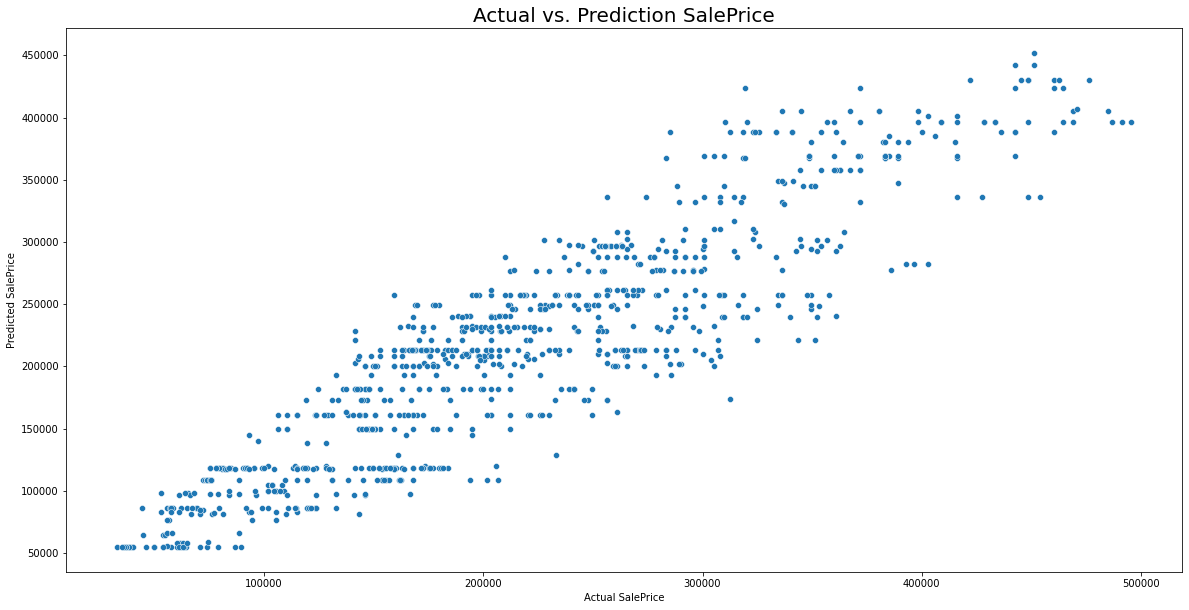

In [40]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)
plt.title('Actual vs. Prediction SalePrice', size=20)
plt.xlabel('Actual SalePrice'),
plt.ylabel('Predicted SalePrice');

**Feature Importances**

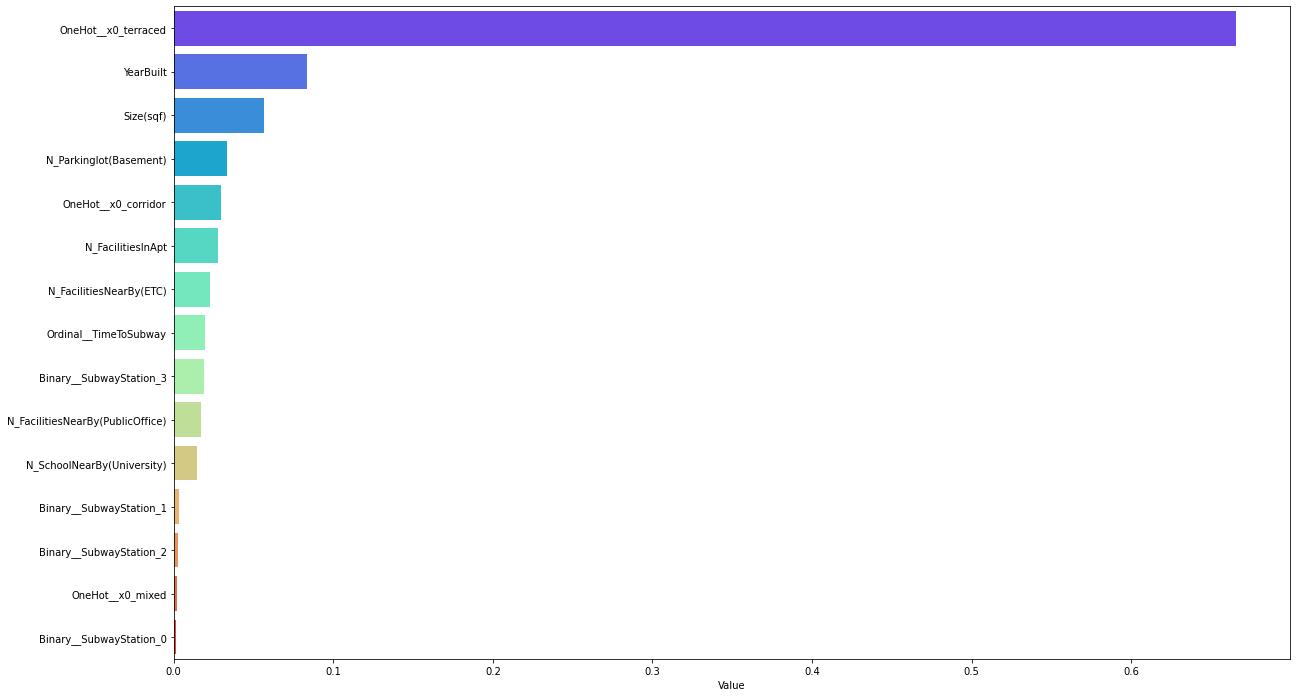

In [41]:
# Plot feature importances
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, transformer.get_feature_names(), 
                           columns=['Value']).sort_values(by='Value', ascending=False)

plt.figure(figsize=(20,12))
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index, palette='rainbow');

Berdasarkan plot Feature Importance di atas, Tipe Hallway Terraced merupakan fitur yang sangat mempengaruhi harga jual apartment. Mungkin ini sama seperti quick EDA di awal, bahwa tipe hallway Terraced merupakan salah satu fasilitas yang diperhatikan karena tahun pembangunannaya. Karena jika tipe hallwaynya terraced berarti umur apartment masih lumayan baru sehingga harganya pun terpengaruh. Ini dibuktikan dengan fitur YearBuilt menjadi feature importance peringkat kedua.

In [42]:
# dataframe baru yang bersumber dari dataframe df
df_compare = df.copy()

# Dataset yang terdiri dari kolom luas apartment, Tipe Hallway dan harga apartment aktual
df_compare[['Size(sqf)','N_Parkinglot(Basement)','SalePrice']].head()

,Size(sqf),N_Parkinglot(Basement),SalePrice
0,1387,1270.0,346017
1,914,0.0,150442
2,558,56.0,61946
3,914,798.0,165486
4,1743,536.0,311504


In [43]:
# Harga Prediksi menggunakan model
df_compare['Prediksi'] = (xgb_tuning.predict(X)).round()

# selisih harga antara harga aktual dengan dengan harga prediksi
df_compare['Selisih'] = abs(df_compare['SalePrice']-df_compare['Prediksi'])

# Harga aktual, Harga prediksi dan Selisih harga
df_compare[['Size(sqf)','N_Parkinglot(Basement)','SalePrice','Prediksi','Selisih']].head()

,Size(sqf),N_Parkinglot(Basement),SalePrice,Prediksi,Selisih
0,1387,1270.0,346017,388138.0,42121.0
1,914,0.0,150442,172961.0,22519.0
2,558,56.0,61946,81223.0,19277.0
3,914,798.0,165486,213028.0,47542.0
4,1743,536.0,311504,335828.0,24324.0


Dari perbandingan di atas selisih untuk harga asli dan harga prediksi masih cukup besar. Contohnya saja baris pertama harga prediksi $388138, namun kenyataannya harga apartment tersebut $346017. Selisih in lumayan besar, namun jika kita dilhat dengan dua fitur pendukungnya memiliki luas apartment terbilang cukup luas yaitu 1387sqf dan kapasitas tempat parkir yang juga luas, ini bisa saja tidak terlalu merugikan dengan fitur yang mendukung harga. Selain itu jika selisih harga prediksi dengan aktual cukup besar in bisa jadi keuntungan untuk Agen Properti sendiri yang akan mendapatkan komisi yang besar. 

# **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur `HallwayType_Terraced`, `YearBuilt` dan `Size(sqf)` menjadi fitur yang paling berpengaruh terhadap `SalePrice`. Namun bukan berarti fitur lainnya tidak berpengaruh terhadap target.

 Metrik evaluasi yang digunakan pada model adalah MAE. Jika ditinjau dari nilai MAE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning menggunakan XGBoost, yaitu sebesar 32705.639469, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga apartment di Daegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD  508849), maka perkiraan nilai error yang dihasilkan MAE terbilang cukup kecil yaitu 6,4%. Namun bila disandingkan terhadap model (minimal harga USD 32743), nilai error sangat besar. Oleh karena itu tingkatkan lagi batas minimum untuk Harga Jual Apartment
 
Secara Keseluruhan menggunakan model algoritma XGBoost sudah cukup baik untuk memprediksi harga jual apartment di Kota Daegu. Karena cara kerja algoritma XGBoost yang efisien dan fleksible, Agen Properti di Daerah Daebong, Daegu dapat memprediksi harga-harga apartment dan mendapatkan komisi yang cukup besar.


# **Recommendations**

Rekomendasi untuk membuat pemodelan yang lebih baik, yaitu :

- Memberikan batasan minimum nilai SalePrice yang lebih tinggi, karena terdapat  error yang besar untuk dapat diprediksi dengan harga yang rendah. - Menambah jumlah data agar model dapat banyak berlatih
- Menambah fitur/fasilitas yang dapat mempengaruhi nilai SalePrice 
- Menggunakan algoritma lainnya yang lebih kompleks agar dapat meminimalisir error

****


#### **Save Model**

In [44]:
# #Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Daegu_XGB.sav', 'wb'))

# # #Load model
# # filename = 'Model_Daegu_XGB.sav'
# # loaded_model = pickle.load(open(filename, 'rb'))
# # np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))